In [2]:
#importamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [5]:
#Definimos parametros
data_folder = '/Volumes/Expansion/Datos G. omarorum/' #Cambiar ruta a la carpeta donde estan los archivos .pkl (obtenidos de EOD_analysis)
os.chdir(data_folder)
files = glob.glob('*.csv')
files

['Prob_novelty_dur_obj.csv', 'Prob_novelty_basal.csv']

In [6]:
nov_basal = pd.read_csv(files[1], header=0)
nov_obj = pd.read_csv(files[0], header=0)


   Unnamed: 0    P does     P sec
0           0  0.013574  0.498413
1           1  0.073781  2.890476
2           2  0.033113  1.265079
3           3  0.043638  1.584127
4           4  0.056734  2.233333    Unnamed: 0    P does     P sec
0           0  0.057790  4.363492
1           1  0.084939  6.368254
2           2  0.067186  4.985714
3           3  0.055453  4.069841
4           4  0.064201  4.469841


In [36]:
nov_basal['pez'] = nov_basal.index // 5

# Use groupby to group by the 'group' column and then calculate the mean
basal_peces = nov_basal.groupby('pez').mean()
nov_sec_basal = basal_peces['P sec']
nov_sec = pd.DataFrame(zip(nov_sec_basal, nov_obj['P sec']), columns=['Basal', 'Objeto'])

nov_sec_melted = nov_sec.melt()

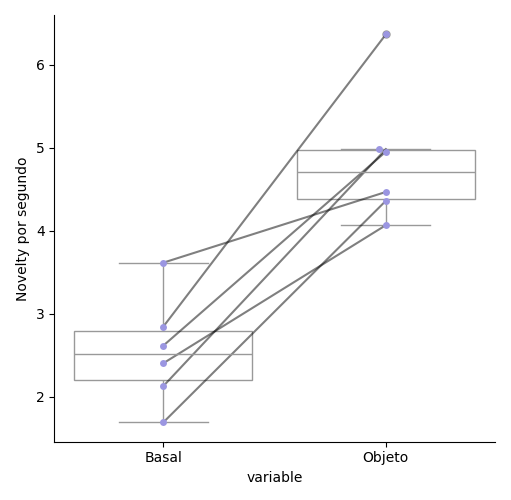

In [37]:
%matplotlib widget
import seaborn as sns
box = sns.catplot(data=nov_sec_melted, 
            x = 'variable',
            y = 'value',
            kind='box',
            errorbar='sd',
            estimator='median',
            color='white')
points = sns.swarmplot(data=nov_sec_melted, x='variable', y='value', size=5, color='#9B96E1')
for j in range(len(nov_sec)):
    plt.plot(nov_sec.iloc[j,:], c='k', alpha=.5)
box.set(ylabel='Novelty por segundo')
plt.show()

In [38]:
from scipy.stats import wilcoxon

res = wilcoxon(nov_sec['Objeto'], nov_sec['Basal'],  alternative='greater')
print(res.statistic, res.pvalue)

21.0 0.015625


In [39]:
nov_sec

,Basal,Objeto
0,1.694286,4.363492
1,2.847937,6.368254
2,2.131111,4.985714
3,2.406349,4.069841
4,3.618095,4.469841
5,2.618730,4.955556
